In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---------------------------------------------------------------------------------------
# Application evaluation

---------------------------------------------------------------------------------------

In [3]:
applications = pd.read_csv('applications/applications.csv')
applications

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726


---------------------------------------------------------------------------------------
## 1. Data cleaning in the ‘applications.csv’ file

---------------------------------------------------------------------------------------

In [5]:
# verification of the current number of non-null records per column and data type
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13315 non-null  object 
 1   Amount           13272 non-null  float64
 2   Age              13315 non-null  int64  
 3   Gender           13315 non-null  object 
 4   Industry         13315 non-null  object 
 5   Marital status   13315 non-null  object 
 6   External Rating  13243 non-null  float64
 7   Education level  13282 non-null  object 
 8   Location         11540 non-null  object 
 9   applicant_id     13315 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


---------------------------------------------------------------------------------------
### 1.1. Duplicate data in ‘applicant_id’ column

---------------------------------------------------------------------------------------

In [7]:
# verification of the target number of records for the 'applicant_id' column (after deletion of duplicates)
applications['applicant_id'].nunique()

13278

-----------------------------------------------------------------------------------------
*I check for certainty whether the records containing the same ‘applicant_id’ value are all the same, or whether they differ e.g. additionally only in a categorical variable which may be of importance in the evaluation, i.e. primarily the value in the ‘Industry’ field
(I verify the others at the same time: ‘Amount’, ‘Age’, ‘Marital status’, ‘External Rating’, which should be identical, but there may be missing values e.g. by mistake in 1 of several records for the same ‘applicant_id’)*

-----------------------------------------------------------------------------------------
>
>

In [9]:
# review of duplicate values:

# 1. selecting duplicates
duplicated_id = applications.loc[applications['applicant_id'].duplicated()]

# 2. grouping and aggregation by number of unique values
dupl_id_gr = duplicated_id.groupby(by = ['applicant_id'])[['Industry', 'External Rating']].nunique()

# 3. selection of records containing > 1 unique value
dupl_id_gr.loc[(dupl_id_gr['Industry'] > 1) | (dupl_id_gr['External Rating'] > 1)]

,Industry,External Rating
applicant_id,,
4468a499e275b96988b2c7c7fbfc545b,9,5


In [10]:
dupl_appl_id = '4468a499e275b96988b2c7c7fbfc545b'

In [11]:
# checking rows that have the same 'applicant_id' but different values in other columns:
dupl_id_uniq = applications.loc[applications['applicant_id'] == dupl_appl_id].sort_values(by = 'Industry')
dupl_id_uniq

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
6588,12.08.2022 11:29,NaN,19,Жінка,AR/VR,Other,2.0,Ще студент вишу,NaN,4468a499e275b96988b2c7c7fbfc545b
11228,12.26.2022 13:47:50,NaN,26,Чоловік,Big Data,Married,6.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,4468a499e275b96988b2c7c7fbfc545b
6254,12.07.2022 15:29,NaN,23,Чоловік,Cloud Computing,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,4468a499e275b96988b2c7c7fbfc545b
7844,12.12.2022 11:15,NaN,22,Чоловік,Cloud Computing,Other,3.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,4468a499e275b96988b2c7c7fbfc545b
6435,12.07.2022 20:49,NaN,25,Чоловік,Edtech / Education,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,4468a499e275b96988b2c7c7fbfc545b
6755,12.08.2022 12:24,NaN,24,Чоловік,Logistics,Married,2.0,"Вища (бакалавр, спеціаліст, магістр)",Хмельницький чи область,4468a499e275b96988b2c7c7fbfc545b
5994,12.07.2022 13:34,NaN,25,Жінка,Medtech / Healthcare,Other,2.0,"Вища (бакалавр, спеціаліст, магістр)",Ужгород чи Закарпатська область,4468a499e275b96988b2c7c7fbfc545b
2867,12.01.2022 18:17,NaN,25,Чоловік,Mobile,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,4468a499e275b96988b2c7c7fbfc545b
4764,12.05.2022 18:20,NaN,23,Чоловік,Mobile,Single,1.0,Ще студент вишу,Суми чи область,4468a499e275b96988b2c7c7fbfc545b
2978,12.01.2022 23:03,NaN,31,Чоловік,Real Estate,Single,10.0,"Вища (бакалавр, спеціаліст, магістр)",Вінниця чи область,4468a499e275b96988b2c7c7fbfc545b


In [12]:
dupl_appl_id_n = dupl_id_uniq['applicant_id'].count()
dupl_appl_id_n

11

-----------------------------------------------------------------------------------------
*The value 'applicant_id' = '4468a499e275b96988b2c7c7fbfc545b' may have been assigned to 11 candidates by mistake (different age, gender and other data, so not the same candidate). To avoid confusion at further stages of the analysis, I generate new unique IDs for them.*

-----------------------------------------------------------------------------------------

In [14]:
import uuid

# function to generate UUID
def new_id_uuid(n):
    uuids = [str(uuid.uuid4()).replace('-', '') for _ in range(n)]
    return uuids

# function call (for the number of duplicate IDs to be changed)
new_id = new_id_uuid(dupl_appl_id_n)
new_id

['1af734ad5836463fae02fe7d76989cd3',
 '964ee99b2b7544ebb15a67c638fe5725',
 '0ff6be317cba453ab0fb7b1672417633',
 '01a8f5ef88cf45a6b07dc39f96242da1',
 '689aaa967c924c1785dd874cb8f29862',
 'dfdf96bbb6774d02ae4101acde673fd7',
 'c2292797d23442f98f426c3c711bda47',
 'a99a7b44166e40eca8bd414f605ce457',
 'fb11f7d1a20645c784309de565286131',
 '1db357fc943549598ba04f498840906f',
 'dd2ad9190c92456cbe72afbb0fce64dc']

In [15]:
applications.loc[dupl_id_uniq.index, 'applicant_id'] = new_id

In [16]:
# verification that there are still rows with the ID that was to be changed
applications.loc[applications['applicant_id'] == dupl_appl_id]

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id


In [17]:
# control check of how many unique 'applicant_id' values there currently are
applications['applicant_id'].nunique()

13288

------------------------------------------------------------------------------------------
*Removal of remaining duplicate rows on ‘applicant_id’ basis*

------------------------------------------------------------------------------------------

In [19]:
applications = applications.drop_duplicates(subset = 'applicant_id', keep = 'first')
applications.shape

(13288, 10)

---------------------------------------------------------------------------------------
### 1.2. Missing data in 'External Rating' field

---------------------------------------------------------------------------------------

In [21]:
# null values in 'External Rating'
ext_rat_null = applications.loc[applications['External Rating'].isnull()]
print(ext_rat_null.shape)
ext_rat_null.head()

(72, 10)


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
85,11.30.2022 10:38:01,2850.0,24,Чоловік,E-commerce,Married,NaN,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2ba1eb28088c5b35d5689ebc31e2d24c
208,11.30.2022 11:05:17,16500.0,32,Чоловік,Adtech / Advertising,Other,NaN,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,6354663b7fb7ae4ab7b050a9db99a7d4
209,11.30.2022 11:05:25,6000.0,27,Чоловік,Big Data,Single,NaN,"Вища (бакалавр, спеціаліст, магістр)",Чернівці чи область,64de362d162615a4084953917918f9ba
210,11.30.2022 11:05:28,9900.0,21,Чоловік,E-commerce,Married,NaN,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,70729c1d2dc288cd740f569edd38b54f
211,11.30.2022 11:06:42,4500.0,30,Чоловік,Medtech / Healthcare,Single,NaN,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,1395cbdbfcf8538df3c14639d29972ae


In [22]:
# filling in the missing values in 'External Rating' with zeros
applications.loc[:, 'External Rating'] = applications['External Rating'].fillna(0)
applications.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13288 entries, 0 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13288 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13288 non-null  int64  
 3   Gender           13288 non-null  object 
 4   Industry         13288 non-null  object 
 5   Marital status   13288 non-null  object 
 6   External Rating  13288 non-null  float64
 7   Education level  13255 non-null  object 
 8   Location         11514 non-null  object 
 9   applicant_id     13288 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [23]:
# visual verification of the replacement of null values by zeros in the 'External Rating'
applications.loc[208:211]

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
208,11.30.2022 11:05:17,16500.0,32,Чоловік,Adtech / Advertising,Other,0.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,6354663b7fb7ae4ab7b050a9db99a7d4
209,11.30.2022 11:05:25,6000.0,27,Чоловік,Big Data,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Чернівці чи область,64de362d162615a4084953917918f9ba
210,11.30.2022 11:05:28,9900.0,21,Чоловік,E-commerce,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,70729c1d2dc288cd740f569edd38b54f
211,11.30.2022 11:06:42,4500.0,30,Чоловік,Medtech / Healthcare,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,1395cbdbfcf8538df3c14639d29972ae


---------------------------------------------------------------------------------------
### 1.3. Missing data in 'Education level' field

---------------------------------------------------------------------------------------

In [25]:
# null values in 'Education level'
edu_level_null = applications.loc[applications['Education level'].isnull()]
print(edu_level_null.shape)
edu_level_null.head()

(33, 10)


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
3246,12.02.2022 17:06,2400.0,23,Чоловік,AR/VR,Married,1.0,NaN,Київ чи область,a11cf64fccf393b2e85577c9735b352b
3261,12.02.2022 18:05,9000.0,28,Чоловік,Edtech / Education,Married,3.0,NaN,Дніпро чи область,0a8ab6abab46471ead2f07a3271391b4
3612,12.03.2022 14:57,16500.0,43,Чоловік,Cloud Computing,Single,10.0,NaN,Київ чи область,2a3567cad0274590d4789e8ab1f3c383
3843,12.03.2022 18:58,3000.0,20,Чоловік,E-commerce,Single,2.0,NaN,Ужгород чи Закарпатська область,1da31bdf131d3d6401c27197ed7a81ce
3844,12.03.2022 18:59,7200.0,27,Чоловік,Automotive,Married,0.0,NaN,Київ чи область,8dfe9b589aaa42788de65e0175535d1f


In [26]:
# filling in the missing values in 'Education level' with zeros 
applications.loc[:, 'Education level'] = applications['Education level'].fillna('średnie')
applications.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13288 entries, 0 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13288 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13288 non-null  int64  
 3   Gender           13288 non-null  object 
 4   Industry         13288 non-null  object 
 5   Marital status   13288 non-null  object 
 6   External Rating  13288 non-null  float64
 7   Education level  13288 non-null  object 
 8   Location         11514 non-null  object 
 9   applicant_id     13288 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.6+ MB


In [27]:
# visual verification of the replacement of null values by zeros in the 'Education level'
applications.loc[3843:3845]

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
3843,12.03.2022 18:58,3000.0,20,Чоловік,E-commerce,Single,2.0,średnie,Ужгород чи Закарпатська область,1da31bdf131d3d6401c27197ed7a81ce
3844,12.03.2022 18:59,7200.0,27,Чоловік,Automotive,Married,0.0,średnie,Київ чи область,8dfe9b589aaa42788de65e0175535d1f
3845,12.03.2022 18:59,13500.0,36,Чоловік,Fintech / Banking,Single,8.0,średnie,Київ чи область,8a954d7ec9280ddfbd5306d579e45154


---------------------------------------------------------------------------------------
## 2. Appending a second table from the 'industries.csv' file

---------------------------------------------------------------------------------------

In [29]:
industries = pd.read_csv('applications/industries.csv')
industries

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15
5,E-commerce,15
6,Media,5
7,Інша,10
8,Dating,5
9,Edtech / Education,15


In [30]:
# left join of DataFrames (by 'Industry' column) - scores should be assigned to individual applicants for the industries they have indicated
merged = pd.merge(applications, industries, on = 'Industry', how = 'left')
merged

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
...,...,...,...,...,...,...,...,...,...,...,...
13283,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15
13284,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0
13285,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0
13286,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15


In [31]:
# verification of the merging of tables (number of columns and records)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13288 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13288 non-null  int64  
 3   Gender           13288 non-null  object 
 4   Industry         13288 non-null  object 
 5   Marital status   13288 non-null  object 
 6   External Rating  13288 non-null  float64
 7   Education level  13288 non-null  object 
 8   Location         11514 non-null  object 
 9   applicant_id     13288 non-null  object 
 10  Score            13288 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [32]:
merged

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
...,...,...,...,...,...,...,...,...,...,...,...
13283,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15
13284,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0
13285,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0
13286,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15


---------------------------------------------------------------------------------------

## 3. Evaluation of candidates

Calculation of a total score for each candidate based on 6 criteria

---------------------------------------------------------------------------------------

***Basic requirements:***

* *The total score should be a number between 0 and 100.*
* *The total score is zero if there is no 'Amount' value or if the 'External Rating' is zero.*

>

***6 criteria:***
* *+20 points if the applicant's age is between 35 and 55*
* *+20 points if the application is submitted during the week, excluding the weekend*
* *+20 points if the applicant is married*
* *+10 points if the applicant lives in Warsaw or the Mazovia region*
* *+0 to +20 points from the 'Score' column derived from the 'industries.csv' table*
* *+20 points if 'External Rating' is >= 7 or -20 points if 'External Rating' is <= 2*

In [35]:
# changing the data type for the date of application and adding a column with a separate day of the week based on it
merged['Applied at'] = pd.to_datetime(merged['Applied at'], format = 'mixed')
merged['day_of_week'] = merged['Applied at'].dt.dayofweek
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Applied at       13288 non-null  datetime64[ns]
 1   Amount           13245 non-null  float64       
 2   Age              13288 non-null  int64         
 3   Gender           13288 non-null  object        
 4   Industry         13288 non-null  object        
 5   Marital status   13288 non-null  object        
 6   External Rating  13288 non-null  float64       
 7   Education level  13288 non-null  object        
 8   Location         11514 non-null  object        
 9   applicant_id     13288 non-null  object        
 10  Score            13288 non-null  int64         
 11  day_of_week      13288 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 1.2+ MB


In [36]:
merged

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,day_of_week
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,2
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,2
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,2
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,2
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13283,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,0
13284,2023-01-09 11:14:00,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0,0
13285,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,0
13286,2023-01-09 11:28:00,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15,0


In [37]:
# searching for Warsaw / Masovian Voivodeship in a foreign language
merged['Location'].unique()

# I have not identified Warsaw or the Mazovian Voivodship on the list, so I am omitting this criterion

array(['Івано-Франківськ чи область', nan, 'Київ чи область',
       'Львів чи область', 'Житомир чи область', 'Дніпро чи область',
       'Тернопіль чи область', 'Вінниця чи область',
       'Кропивницький чи область', 'Чернігів чи область',
       'Харків чи область', 'Рівне чи область', 'Запоріжжя чи область',
       'Чернівці чи область', 'Суми чи область', 'Одеса чи область',
       'Черкаси чи область', 'Луцьк чи Волинська область',
       'Ужгород чи Закарпатська область', 'Полтава чи область',
       'Хмельницький чи область', 'Миколаїв чи область',
       'Херсон чи область', 'Донецька чи Луганська область'], dtype=object)

In [38]:
# calculation of the positive and negative points for the final score according to the established criteria (excluding location)
age = ((merged['Age'] >= 35) & (merged['Age'] <= 55)) * 20
day = (merged['day_of_week'] <= 4) * 20
mar_stat = (merged['Marital status'] == 'Married') * 20
ext_rat_pos = (merged['External Rating'] >= 7) * 20
ext_rat_neg = (merged['External Rating'] <= 2) * (-20)
score = merged['Score']

# total score for individual applicants:
score_sum = age + day + mar_stat + ext_rat_pos + ext_rat_neg + score
score_sum

0        40
1        60
2        30
3        15
4        35
         ..
13283    35
13284    40
13285    40
13286    55
13287    75
Length: 13288, dtype: int64

In [39]:
# inclusion of basic requirements whereby the total final score = 0 regardless of the points obtained from the 6 criteria
def appl_score(row, score_sum):
    if (pd.isnull(row['Amount']) | (row['External Rating'] == 0) | (score_sum[row.name] < 0)):
        return 0
    else:
        return score_sum[row.name]

# function call -> add total final score in new DataFrame column
merged['application_score'] = merged.apply(appl_score, axis = 1,
                                           score_sum = score_sum)

In [40]:
merged

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,day_of_week,application_score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,2,40
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,2,0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,2,30
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,2,0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,0,35
13284,2023-01-09 11:14:00,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0,0,40
13285,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,0,40
13286,2023-01-09 11:28:00,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15,0,55


In [41]:
merged['application_score'].describe()

count    13288.000000
mean        44.105208
std         23.577719
min          0.000000
25%         30.000000
50%         40.000000
75%         60.000000
max        100.000000
Name: application_score, dtype: float64

---------------------------------------------------------------------------------------
## 4. Extraction of accepted applications (total final score > 0)
---------------------------------------------------------------------------------------



In [43]:
# identification of applications with total final score = 0
drop_idx = merged.loc[merged['application_score'] == 0].index
drop_idx

Index([    1,     3,     9,    11,    17,    22,    27,    44,    49,    66,
       ...
       13233, 13235, 13237, 13243, 13246, 13248, 13251, 13274, 13276, 13277],
      dtype='int64', length=791)

In [44]:
# removal of unaccepted applications (i.e. with total final score = 0)
appl_score_drop = merged.drop(labels = drop_idx)
appl_score_drop['application_score'].describe()

count    12497.000000
mean        46.896855
std         21.451528
min          5.000000
25%         30.000000
50%         50.000000
75%         60.000000
max        100.000000
Name: application_score, dtype: float64

---------------------------------------------------------------------------------------
## 5. Average score of accepted applications by week of application
---------------------------------------------------------------------------------------


In [46]:
appl_score_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12497 entries, 0 to 13287
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Applied at         12497 non-null  datetime64[ns]
 1   Amount             12497 non-null  float64       
 2   Age                12497 non-null  int64         
 3   Gender             12497 non-null  object        
 4   Industry           12497 non-null  object        
 5   Marital status     12497 non-null  object        
 6   External Rating    12497 non-null  float64       
 7   Education level    12497 non-null  object        
 8   Location           10831 non-null  object        
 9   applicant_id       12497 non-null  object        
 10  Score              12497 non-null  int64         
 11  day_of_week        12497 non-null  int32         
 12  application_score  12497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(6)
me

In [47]:
# addition of an auxiliary column to the DataFrame with the week number and year of application
appl_score_drop['year_week'] = appl_score_drop['Applied at'].apply(lambda x:
                                                                   f"{x.isocalendar().year} - {x.isocalendar().week}")
appl_score_drop

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,day_of_week,application_score,year_week
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,2,40,2022 - 48
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,2,30,2022 - 48
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,2,35,2022 - 48
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,2,55,2022 - 48
6,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,2,25,2022 - 48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,0,35,2023 - 2
13284,2023-01-09 11:14:00,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0,0,40,2023 - 2
13285,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,0,40,2023 - 2
13286,2023-01-09 11:28:00,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15,0,55,2023 - 2


In [48]:
# grouping of data by week of application
appl_score_week = appl_score_drop.groupby(by = ['year_week'])

In [49]:
# calculation of applicants' average scores for each application week
score_week_mean = appl_score_week[['application_score']].agg('mean')
score_week_mean

,application_score
year_week,
2022 - 48,47.841314
2022 - 49,46.187138
2022 - 50,46.348837
2022 - 51,44.296365
2022 - 52,47.861702
2023 - 1,48.744222
2023 - 2,50.625000


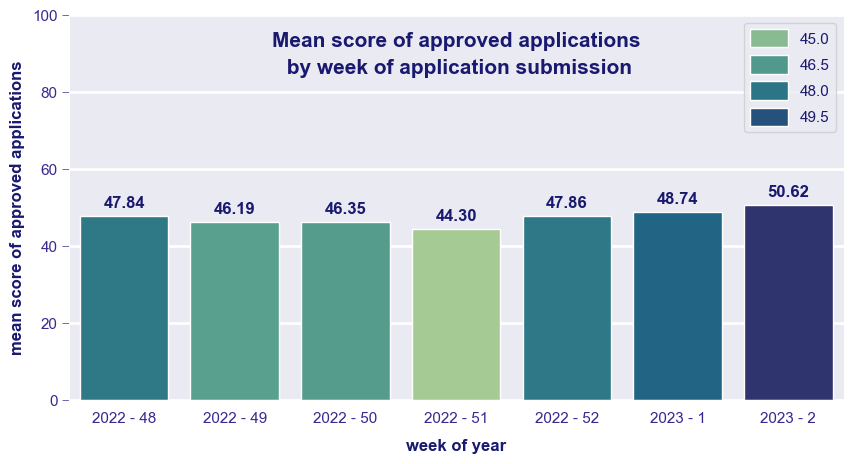

In [50]:
sns.set_style("darkgrid")
plt.subplots(figsize = (10, 5))


x = score_week_mean.index
y = score_week_mean['application_score']

ax = sns.barplot(data = score_week_mean, x = x, y = y,
                 hue = y, palette = 'crest', saturation = 0.9)
                 #, linewidth = 1.5, edgecolor = 'lightsteelblue')


# addition of labels with values above the bars:
for container in ax.containers:
    ax.bar_label(container, color ='midnightblue', padding = 4, fmt = '%.2f', 
                 fontsize = 12, fontweight = 'semibold')#,label_type='center')

# marks and values on the axes, grid lines:
plt.tick_params(axis = 'both', pad = 3, labelsize = 11, colors = '#362A91', which = 'both', 
                bottom = False, left = True, direction = 'out', length = 5, width = 0.5,
                grid_linewidth = 2)
plt.ylim(0, 100)

# axis labels:
plt.xlabel('week of year', labelpad = 10, color = "midnightblue",
           fontsize = 12, fontweight = 'semibold')
plt.ylabel('mean score of approved applications', labelpad = 5, color = "midnightblue",
           fontsize = 12, fontweight = 'semibold')


plt.legend(fontsize = 11, labelcolor = 'midnightblue', 
           handleheight = 1.5, handlelength = 2.5)

plt.title("Mean score of approved applications\n by week of application submission", pad = -42,
          color = "midnightblue", fontsize = 15, fontweight = 'semibold', linespacing = 1.5)

plt.show()